In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy import stats
import seaborn as sns
from abc import ABC,abstractmethod
def Vector(*args):
    return np.array(args)
default_style = lambda c : {**c,'color':'white'}

class PDistributionPlot(ABC):
    def __init__(self,params,style):
        self.params = params
        self.style  = style
        self.random_state = np.random.RandomState(1234)
        
    @abstractmethod
    def fx(self,x):
        pass
    @abstractmethod
    def random(self):
        pass
class BinomialDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.binom
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        
    def fx(self,x):
        return self.distribution.pmf(x,n = self.params['n'],p=self.params['p'])
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
class PoissonDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.poisson
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        
    def fx(self,x):
        return self.distribution.pmf(x,mu = self.params['mu'])
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
class GaussianDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.norm
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        
    def fx(self,x):
        return self.distribution.pdf(x,loc=self.params['loc'],scale=self.params['scale']  )
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
    
class TDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.t
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        
    def fx(self,x):
        return self.distribution.pdf(x,
                                     self.params['df'],
                                     loc=self.params['loc'],
                                     scale=self.params['scale']
                                    )
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
class Chi2DistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.chi2
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        
    def fx(self,x):
        return self.distribution.pdf(x,self.params['df'],loc=self.params['loc'],scale=self.params['scale'])
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
class FDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.f
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        
    def fx(self,x):
        
        return self.distribution.pdf(x,dfn  = self.params['dfn'],
                                     dfd  = self.params['dfd'],
                                     loc=self.params['loc'],
                                     scale=self.params['scale']
                                    )
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
red_style = default_style({'edgecolor':"red","hatch":"/",'alpha':.8})
green_style = default_style({'edgecolor':"green","hatch":"*",'alpha':.5})
black_style = default_style({'edgecolor':"black","hatch":".",'alpha':.5})
blue_style = default_style({'edgecolor':"blue","hatch":"+",'alpha':.5})


## Binomial distribution

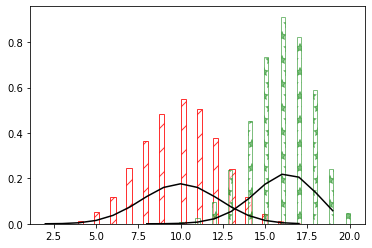

In [106]:
binomial_plots =  (
    BinomialDistributionPlot({'n':20,'p':0.5,'size':10000},red_style),  
    BinomialDistributionPlot({'n':20,'p':0.8,'size':10000},green_style),  
)
plot_pdistribution(
    distribution_plots = binomial_plots, 
    show_fx   = True
)

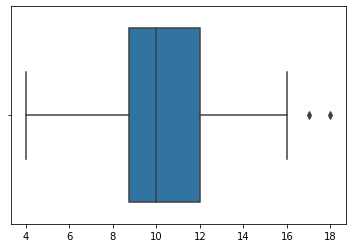

In [264]:
rand_state = np.random.RandomState(1234)
x = stats.binom.rvs(size=1000,p=.5,n=20,random_state=rand_state)
ax = sns.boxplot(x=x)

## Poisson distribution

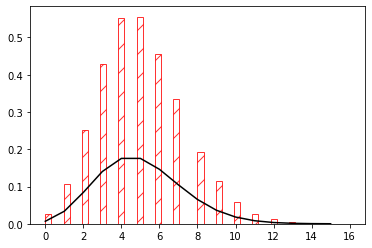

In [122]:
poisson_plots = (
    PoissonDistributionPlot({'size':10000,'mu':5},red_style),
#     PoissonDistributionPlot({'size':10000,'mu':10},green_style),
#     PoissonDistributionPlot({'size':10000,'mu':4},black_style),
)
plot_pdistribution(
    distribution_plots = poisson_plots,
    show_fx   = True
)

## Guassian distribution

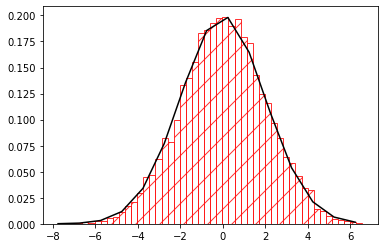

In [117]:

normal_plots = (
    GaussianDistributionPlot({'size':10000,'loc':0,'scale':2},red_style),
)
plot_pdistribution(
    distribution_plots = normal_plots,
    show_fx   = True
)

## T-distribution

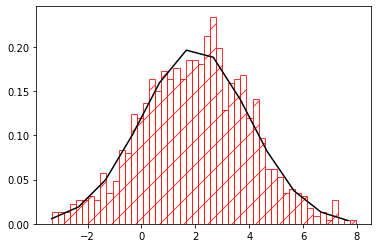

In [116]:
t_plots = (
    TDistributionPlot({'size':1000,'df':500,'loc':2,'scale':2},red_style),
)
plot_pdistribution(
    distribution_plots = t_plots,
    show_fx   = True
)

## Chi-squared distribution

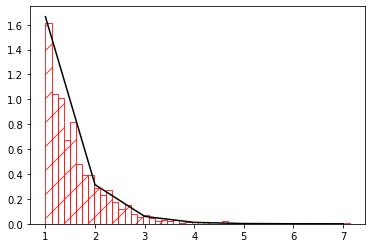

In [143]:
chi2_plots = (
   Chi2DistributionPlot({'size':1000,'df':2,'loc':1,'scale':0.3},red_style) ,
)
plot_pdistribution(
    distribution_plots = chi2_plots,
    show_fx   = True
)

## F - distribution

In [ ]:
f_plots = (
    FDistributionPlot({'size':1000,'dfn':1,'dfd':1,'loc':0,'scale':1},red_style),
#     FDistributionPlot({'size':1000,'dfn':2,'dfd':1,'loc':0,'scale':1},green_style),
)
plot_pdistribution(
    distribution_plots = f_plots,
    show_fx            = True 
)

In [181]:
# stats.poisson.pmf(1,mu=1)
# data = np.random.poisson(lam=500,size=1000)
# sns.boxplot(y=data)
# data

0.36787944117144233

# Utils

In [5]:
def plot_pdistribution(**kwargs):
    distributions = kwargs.get("distribution_plots",[])
    show_fx       = kwargs.get("show_fx",False) 
    _,ax       = plt.subplots()
    if(show_fx):
        ys = list( map( lambda d: d.fx(d.x),distributions ))
        for d,y in zip(distributions,ys):
            ax.plot(d.x,y,color="black")
    for d in distributions:
        ax.hist(d.data,**d.style,bins=50,density=True)
    plt.show()